<a href="https://colab.research.google.com/github/Krushikkk/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Krushik Kalavadiya
##### **Team Member 2 -** Kishan Hirapara


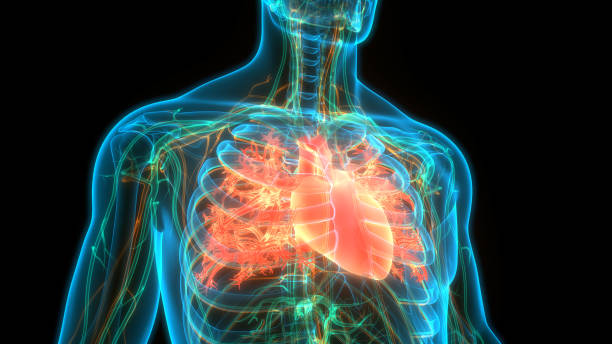

# **Project Summary -**

**1) Introduction**:

The Framingham Heart Study dataset provides patient information with 15 attributes, including demographic, behavioral, and medical risk factors of CHD. Cardiovascular risk prediction is crucial for early detection and prevention of cardiovascular diseases (CVDs) like coronary heart disease (CHD), which are the leading cause of death globally. By accurately predicting the likelihood of an individual developing CHD, healthcare professionals can provide targeted interventions, such as lifestyle modifications and medical treatments, to reduce the risk.



**2) Objective:** 

The objective is to build a classification model to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) using demographic, behavioral, and medical risk factors. By achieving this objective, healthcare providers can identify patients at high risk of CHD early and take necessary preventive measures to reduce the incidence of CHD, thus improving patient health outcomes. 



**3) Approach**: 

1. Know the dataset
2. Understanding Your Variables
3. Data wrangling
4. EDA
5. Hypothesis testing
6. Feature Engineering & Data Pre-processing
7. ML model implementation 

   Logistic regression

   Random Forest Classifier

   XG Boost Classifier
8. Conclusion

# **GitHub Link -**

https://github.com/Krushikkk/Cardiovascular_Risk_Prediction

# **Problem Statement**


The challenge is to build a classification model that predicts whether a patient has a 10-year risk of future coronary heart disease (CHD) using demographic, behavioral, and medical risk factors. By achieving this objective, healthcare providers can identify patients at high risk of CHD early and take necessary preventive measures to reduce the incidence of CHD, thus improving patient health outcomes. 


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn.rcmod import set_style
sns.set_theme(style= 'whitegrid', palette = 'Set2')
from sklearn.impute import KNNImputer

# Sampling
from imblearn.over_sampling import RandomOverSampler

# Scaling
from sklearn.preprocessing import StandardScaler

# Import the model_selection module from scikit-learn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter Submission File Classification/data_cardiovascular_risk.csv')

In [4]:
# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [5]:
# Dataset First 
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

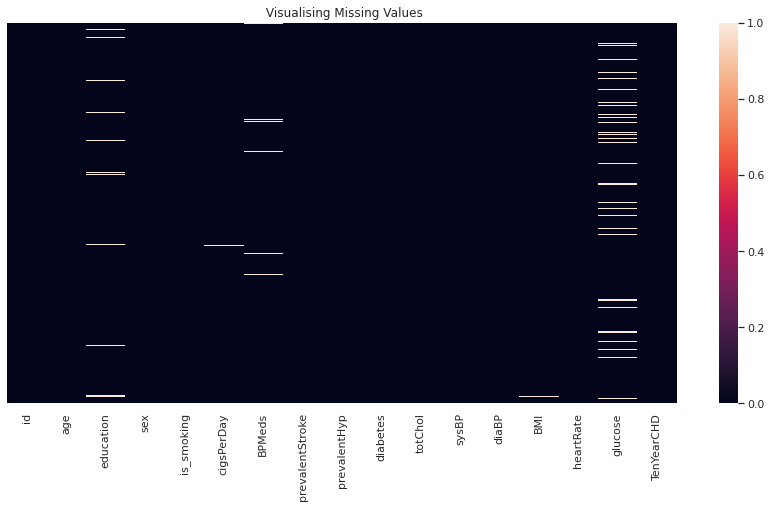

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

In our dataset, there are seven columns with null values: education, cigsPerDay, BPMeds, totChol, BMI, heartRate, and glucose.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

**id**: A unique identifier for the patient, used to track the patient's record.

**education**: The level of education of the patient, which can be used as a proxy for socioeconomic status.

**Age**: The age of the patient in years.

**Sex (Gender)**: The biological gender of the patient, typically coded as "male" or "female."

**is_smoking**: A binary variable indicating whether the patient is currently a smoker (1) or not (0).

**Cigs Per Day**: The number of cigarettes smoked per day by the patient, if they are a current smoker.

**BP_Meds**: A binary variable indicating whether the patient is currently taking blood pressure medication (1) or not (0).

**Prevalent Stroke**: A binary variable indicating whether the patient has a history of stroke (1) or not (0).

**Prevalent hyp**: A binary variable indicating whether the patient has a history of hypertension (1) or not (0).

**Diabetes**: A binary variable indicating whether the patient has diabetes (1) or not (0).

**Tot Chol**: The total cholesterol level of the patient, measured in milligrams per deciliter (mg/dL).

**Sys BP**: The systolic blood pressure of the patient, measured in millimeters of mercury (mmHg).

**Dia BP**: The diastolic blood pressure of the patient, measured in millimeters of mercury (mmHg).

**BMI**: The Body Mass Index of the patient, calculated as weight (in kilograms) divided by height (in meters) squared.

**Heart Rate**: The heart rate of the patient, measured in beats per minute (BPM).

**glucose**: The glucose level in the blood, measured in milligrams per deciliter (mg/dL).

**TenyearCHD**: A binary variable indicating whether the patient has a 10-year risk of future coronary heart disease (CHD) (1) or not (0).


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
# Rename columns
df.rename(columns = {'is_smoking':'smoking', 'TenYearCHD': 'Risk'}, inplace =True)
df.columns

Index(['id', 'age', 'education', 'sex', 'smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

In [15]:
# Drop the unnesessary column and change data type
df.drop('id', axis = 1, inplace = True)

In [16]:
# Fill the null value in categorical columns

# Finding the most frequent value in BPMeds column
most_frequent_bpmeds = df['BPMeds'].mode()[0]

# Filling in null values with most frequent value
df['BPMeds'].fillna(most_frequent_bpmeds, inplace = True)

# Finding the most frequent value in education column
most_frequent_education = df['education'].mode()[0]

# Filling in null values with most frequent value
df['education'].fillna(most_frequent_education, inplace = True)

In [17]:
# Fill the null values in continous columns using KNNImupter

# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# Fit the imputer to the DataFrame
imputer.fit(df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

# Transform the DataFrame to fill in the null values
df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']] = imputer.transform(df[['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']])

In [18]:
df.isnull().sum()

age                0
education          0
sex                0
smoking            0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Risk               0
dtype: int64

### What all manipulations have you done and insights you found?

To prepare the dataset for further analysis and modeling, we first rename some column names for clarity and consistency. We then drop the "id" column since it contains all unique values and does not provide any useful information.

Next, we fill the null values in categorical columns with mode and in numerical columns with KNN imputer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

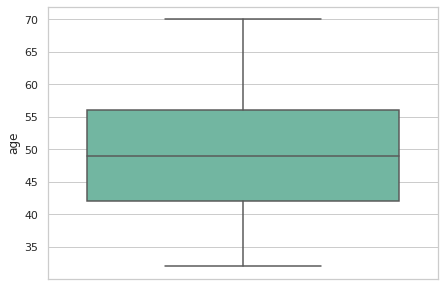

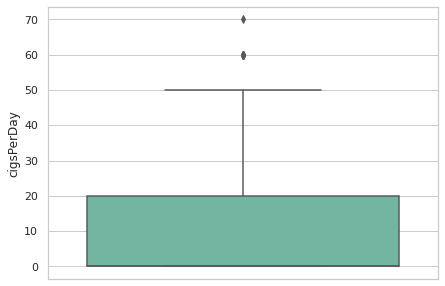

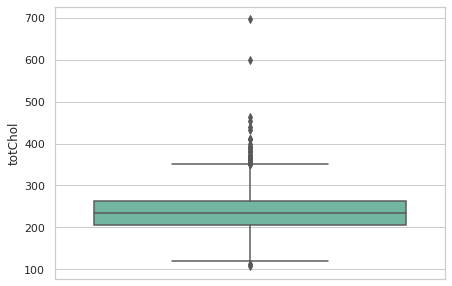

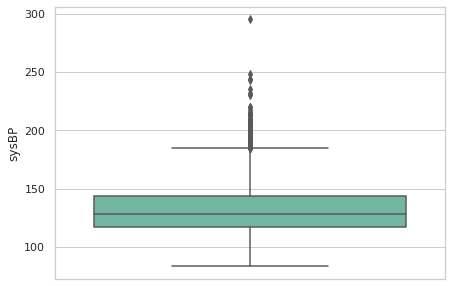

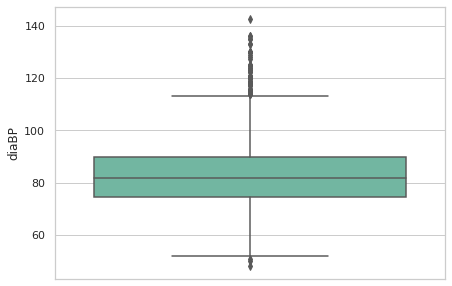

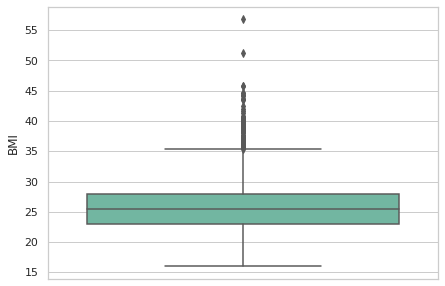

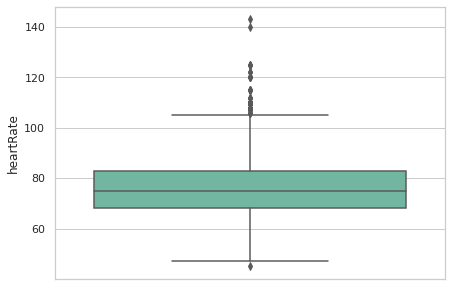

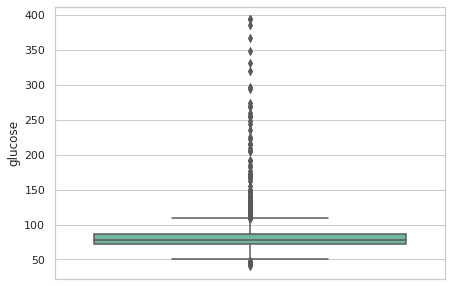

In [19]:
# Chart - 1 visualization code

num_var = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

# Numerical features plotting
for i in num_var:
    plt.figure(figsize=(7,5))  
    sns.boxplot(y = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

I picked the boxplot chart because it is a good way to visualize the distribution of numerical data. The boxplot also shows the quartiles, minimum and maximum values, and any outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

From the boxplots, we can see the distribution of the numerical variables and identify any outliers. For example, we can see that the 'glucose' variable has a large number of outliers. We can also see that the range of the 'age' variable is from 33 to 70.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the dataset pertains to a healthcare business, identifying heavy smokers and individuals with high blood pressure could help in developing targeted interventions or preventative measures to improve their health outcomes. Similarly, understanding the distribution of glucose levels could help in identifying individuals at risk for diabetes and developing preventative measures or interventions to reduce that risk.

#### Chart - 2

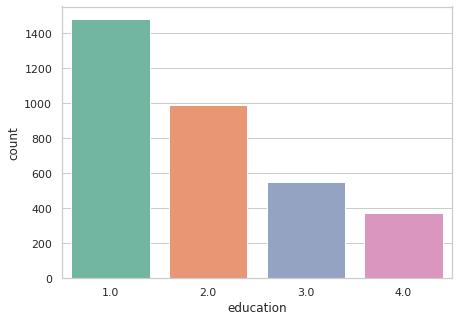

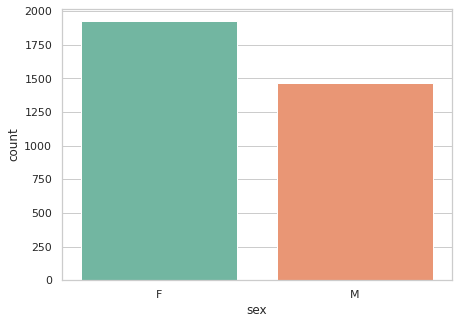

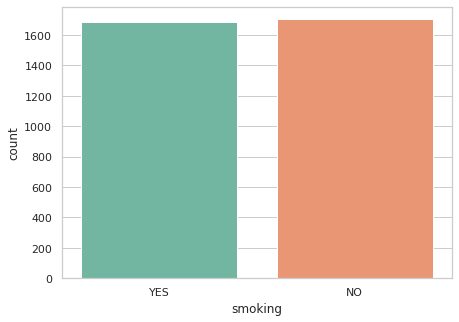

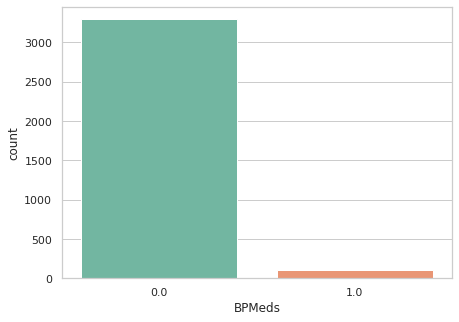

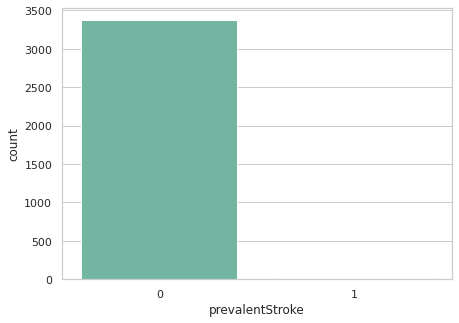

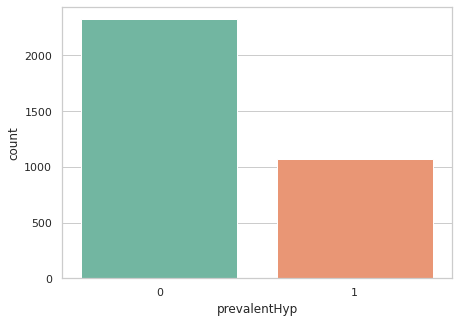

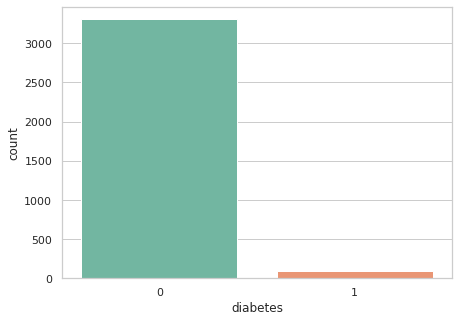

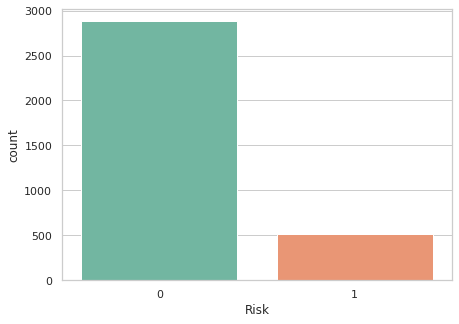

In [20]:
# Chart - 2 visualization code

cat_var = ['education','sex','smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes','Risk']

# Cateogrical feature plotting
for i in cat_var:
    plt.figure(figsize=(7,5))
    sns.countplot(x = df[i])
    plt.show()

##### 1. Why did you pick the specific chart?

I picked the countplot chart because it is useful for visualizing the count or frequency of categorical variables.

##### 2. What is/are the insight(s) found from the chart?

By analyzing these charts, We can identify insights such as the fact that the majority of patients are female compared to male, most of the patients don't take BP medication, and a majority of the patients do not have a chance of developing CHD in the future.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the analysis can have a positive impact on business decisions. For instance, targeting marketing towards the majority of female patients can help increase business growth. Similarly, providing additional resources and support to patients with a history of stroke or hypertension can lead to improved patient satisfaction and loyalty, resulting in positive business outcomes.

#### Chart - 3

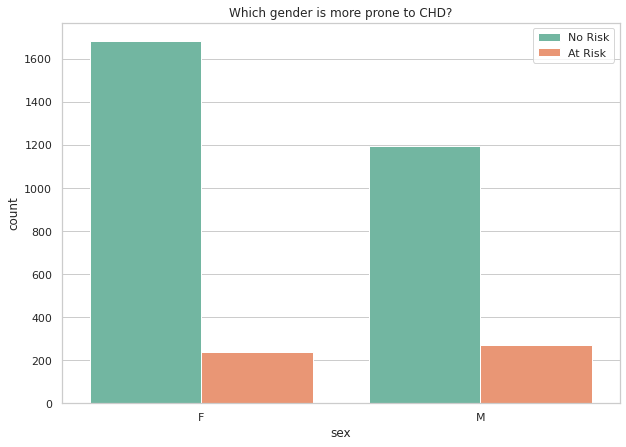

In [21]:
# Chart - 3 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.sex, hue=df.Risk)
plt.title('Which gender is more prone to CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the gender-wise distribution of CHD risk in the patient population.

##### 2. What is/are the insight(s) found from the chart?

*The* chart indicates that a higher number of male patients are at risk of developing CHD compared to female patients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact by informing targeted marketing efforts and resource allocation towards male patients who are at a higher risk of developing CHD.

#### Chart - 4

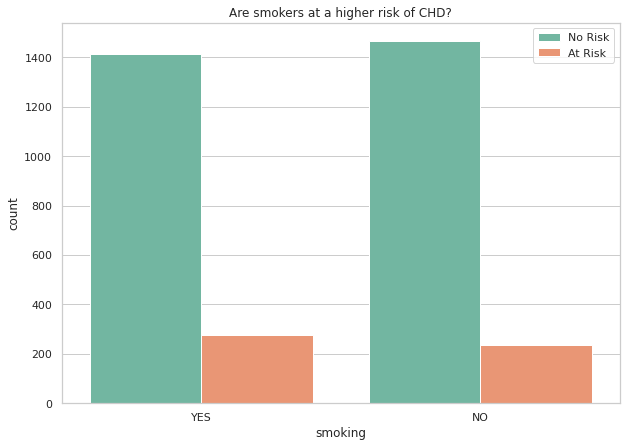

In [22]:
# Chart - 4 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.smoking, hue=df.Risk)
plt.title('Are smokers at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart because it provides insights into whether smoking is a risk factor for CHD.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that smokers are at a higher risk of developing CHD compared to non-smokers. This indicates that smoking is indeed a risk factor for CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can certainly help create a positive business impact by informing business decisions related to health campaigns and messaging. For example, this information can be used to target anti-smoking campaigns towards smokers and raise awareness about the risks associated with smoking, potentially leading to reduced smoking rates and improved public health outcomes.

#### Chart - 5

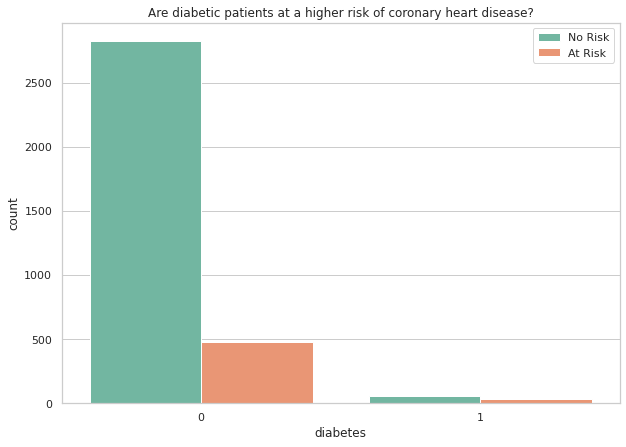

In [68]:
# Chart - 5 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.diabetes, hue=df.Risk)
plt.title('Are diabetic patients at a higher risk of coronary heart disease?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of diabetic patients at no risk and at risk of coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, it appears that there are a high number of patients who do not have diabetes but are at risk for coronary heart disease (CHD).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help create a positive business impact by enabling businesses in the healthcare industry to better understand the relationship between diabetes and CHD risk. This information can be used to develop more effective prevention and treatment strategies for individuals who are at risk for CHD.

#### Chart - 6

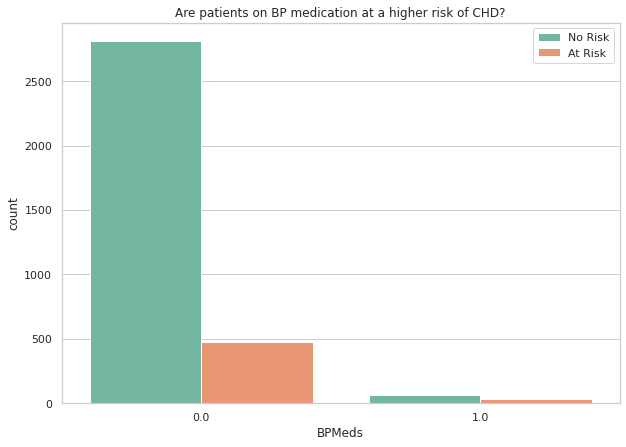

In [69]:
# Chart - 6 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.BPMeds, hue=df.Risk)
plt.title('Are patients on BP medication at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of patients with and without CHD risk who are on blood pressure medication, and to visualize the relationship between medication use and CHD risk.

##### 2. What is/are the insight(s) found from the chart?

There are more patients who are not on blood pressure medication and are at risk for CHD compared to those who are on medication and at risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to develop more effective prevention and treatment strategies for patients with high blood pressure who are at risk for CHD. However, it is also important to note that the chart does not provide any causal relationship between blood pressure medication and CHD risk, and further research would be needed to establish any such relationship. 

#### Chart - 7

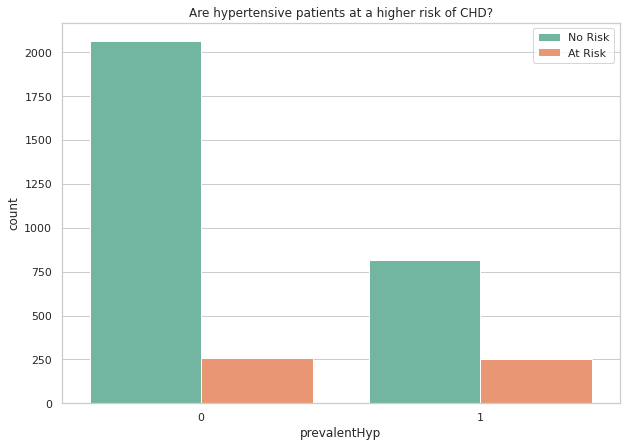

In [70]:
# Chart - 7 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.prevalentHyp, hue=df.Risk)
plt.title('Are hypertensive patients at a higher risk of CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

This chart was likely chosen because it allows us to compare the counts of patients with and without CHD risk who have hypertension.

##### 2. What is/are the insight(s) found from the chart?

The number of patients with hypertension and without hypertension who are at risk for CHD is the same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If a business operates in the healthcare industry, the insight that the number of patients with and without hypertension who are at risk for CHD is the same could potentially inform their product or service offerings, marketing strategies, or other business decisions.

#### Chart - 8

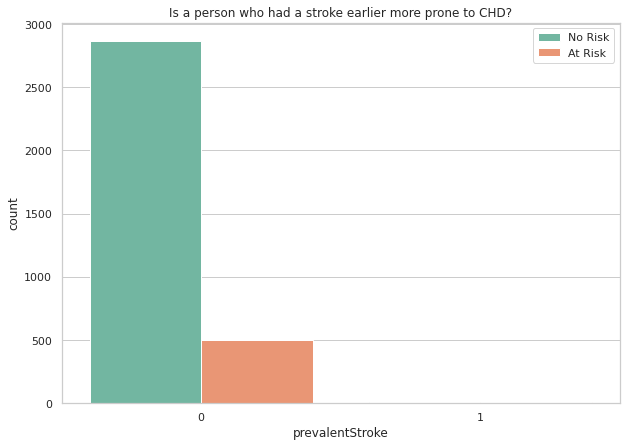

In [71]:
# Chart - 8 visualization code

plt.figure(figsize=(10,7))
sns.countplot(df.prevalentStroke, hue=df.Risk)
plt.title('Is a person who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk','At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

To compare the counts of patients with and without CHD risk who have a stroke in the past.

##### 2. What is/are the insight(s) found from the chart?

There are a few patients who have had a stroke in the past, and a high number of patients who have not had a stroke in the past but are at risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help in creating a positive business impact by providing valuable information to healthcare professionals and policymakers. They can use this information to develop effective prevention and management strategies for CHD in people who have had a stroke earlier. This can help in reducing the incidence and burden of CHD, thereby improving the overall health outcomes of the population.

#### Chart - 9

In [27]:
# Chart - 9 visualization code

plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df['sex'], y=df['age'], hue=df.Risk)
plt.title('Which Age Group is more vulnerable to CHD?')
legend_handles, _ = ax.get_legend_handles_labels()          
ax.legend(legend_handles, ['No Risk', 'At Risk'], loc="best")
plt.show()

##### 1. Why did you pick the specific chart?

To know which age group is more vulnerable to CHD in both genders.

##### 2. What is/are the insight(s) found from the chart?

The male age group of 50 to 55 and the female age group of 55 to 60 are at risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help inform public health strategies to prevent and manage CHD. By identifying which age and sex groups are most vulnerable, healthcare providers and public health officials can develop targeted interventions to reduce the incidence and burden of the disease. 

#### Chart - 10

In [28]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [29]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [30]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [31]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [32]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [33]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [37]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [38]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [39]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [40]:
# Expand Contraction

#### 2. Lower Casing

In [41]:
# Lower Casing

#### 3. Removing Punctuations

In [42]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [43]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [44]:
# Remove Stopwords

In [45]:
# Remove White spaces

#### 6. Rephrase Text

In [46]:
# Rephrase Text

#### 7. Tokenization

In [47]:
# Tokenization

#### 8. Text Normalization

In [48]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [49]:
# POS Taging

#### 10. Text Vectorization

In [50]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [51]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [52]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [53]:
# Transform Your data

### 6. Data Scaling

In [54]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [55]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [57]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [58]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [63]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [66]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [67]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***